In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import dataset
df = pd.read_csv('Crop.csv')
data_shape = df.shape

# Visualize the data
data_head = df.head()

# Information of data
data_info = df.info()
data_shape, data_head, data_info

# average,median,mode,variance
mean_values_annotated = ("Average Values:", df.mean())
median_values_annotated = ("Median Values:", df.median())
mode_values_annotated = ("Mode Values:", df.mode().iloc[0])
variance_values_annotated = ("Variance Values:", df.var())

mean_values_annotated, median_values_annotated, mode_values_annotated, variance_values_annotated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_16508\2290125048.py:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values_annotated = ("Average Values:", df.mean())
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_16508\2290125048.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_values_annotated = ("Median Values:", df.median())
C:\Users\ALIENWARE\AppData\Local\Temp\ipykernel_16508\2290125048.py:21: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance_values_annotat

(('Average Values:',
  N               49.992727
  P               53.300000
  K               48.169545
  temperature     25.616244
  humidity        71.481779
  ph               6.469480
  rainfall       103.463655
  dtype: float64),
 ('Median Values:',
  N              37.000000
  P              51.000000
  K              31.000000
  temperature    25.598693
  humidity       80.473146
  ph              6.425045
  rainfall       94.867624
  dtype: float64),
 ('Mode Values:',
  N                   39.0
  P                   55.0
  K                   25.0
  temperature     8.825675
  humidity        14.25804
  ph              3.504752
  rainfall       20.211267
  label              apple
  Name: 0, dtype: object),
 ('Variance Values:',
  N              1383.531552
  P              1067.728968
  K              2567.701573
  temperature      25.641550
  humidity        495.677307
  ph                0.598980
  rainfall       3020.424469
  dtype: float64))

In [2]:
from sklearn.ensemble import IsolationForest
# isolation forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers_prediction = iso_forest.fit_predict(df.iloc[:, :6])

# Identify outliers
df['outliers'] = outliers_prediction

# show
outlier_rows = df[df['outliers'] == -1]
print(outlier_rows)

df_no_outliers = df[df['outliers'] != -1]

# Delete rows identified as outliers
df = df[df['outliers'] != -1]

# Drop the 'outliers' column
df.drop('outliers', axis=1, inplace=True)


       N    P    K  temperature   humidity        ph    rainfall     label  \
210   43   79   85    20.993736  19.334704  8.718193   93.552801  chickpea   
222   47   66   80    17.572121  14.999275  8.519976   89.310507  chickpea   
255   39   78   85    17.574456  16.718266  8.255451   77.818914  chickpea   
295   37   75   83    17.341502  18.756263  8.861480   67.954543  chickpea   
1202   0  145  196    32.445778  83.885049  5.896343   68.739325    grapes   
1205   7  138  199    39.648519  82.210799  6.253035   70.399061    grapes   
1207  18  145  198    12.141907  83.568125  5.647202   69.631220    grapes   
1208   3  126  204    12.756796  81.624974  6.130310   66.778446    grapes   
1209   3  142  200    39.040720  80.183933  6.499605   73.884670    grapes   
1210  20  130  198    39.707722  82.685935  5.554832   74.915062    grapes   
1211   4  122  204     9.467960  82.293355  5.800243   66.027652    grapes   
1214   6  142  199     8.825675  82.897537  5.536646   67.235765

C:\Users\ALIENWARE\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


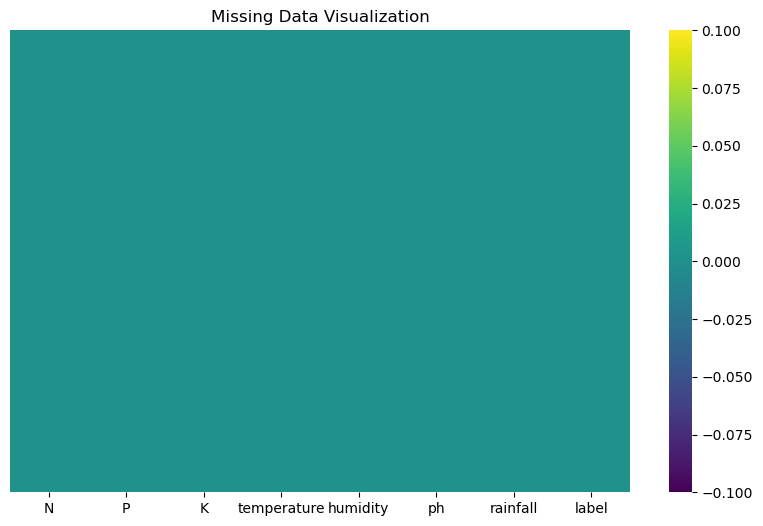

<Figure size 1500x1000 with 0 Axes>

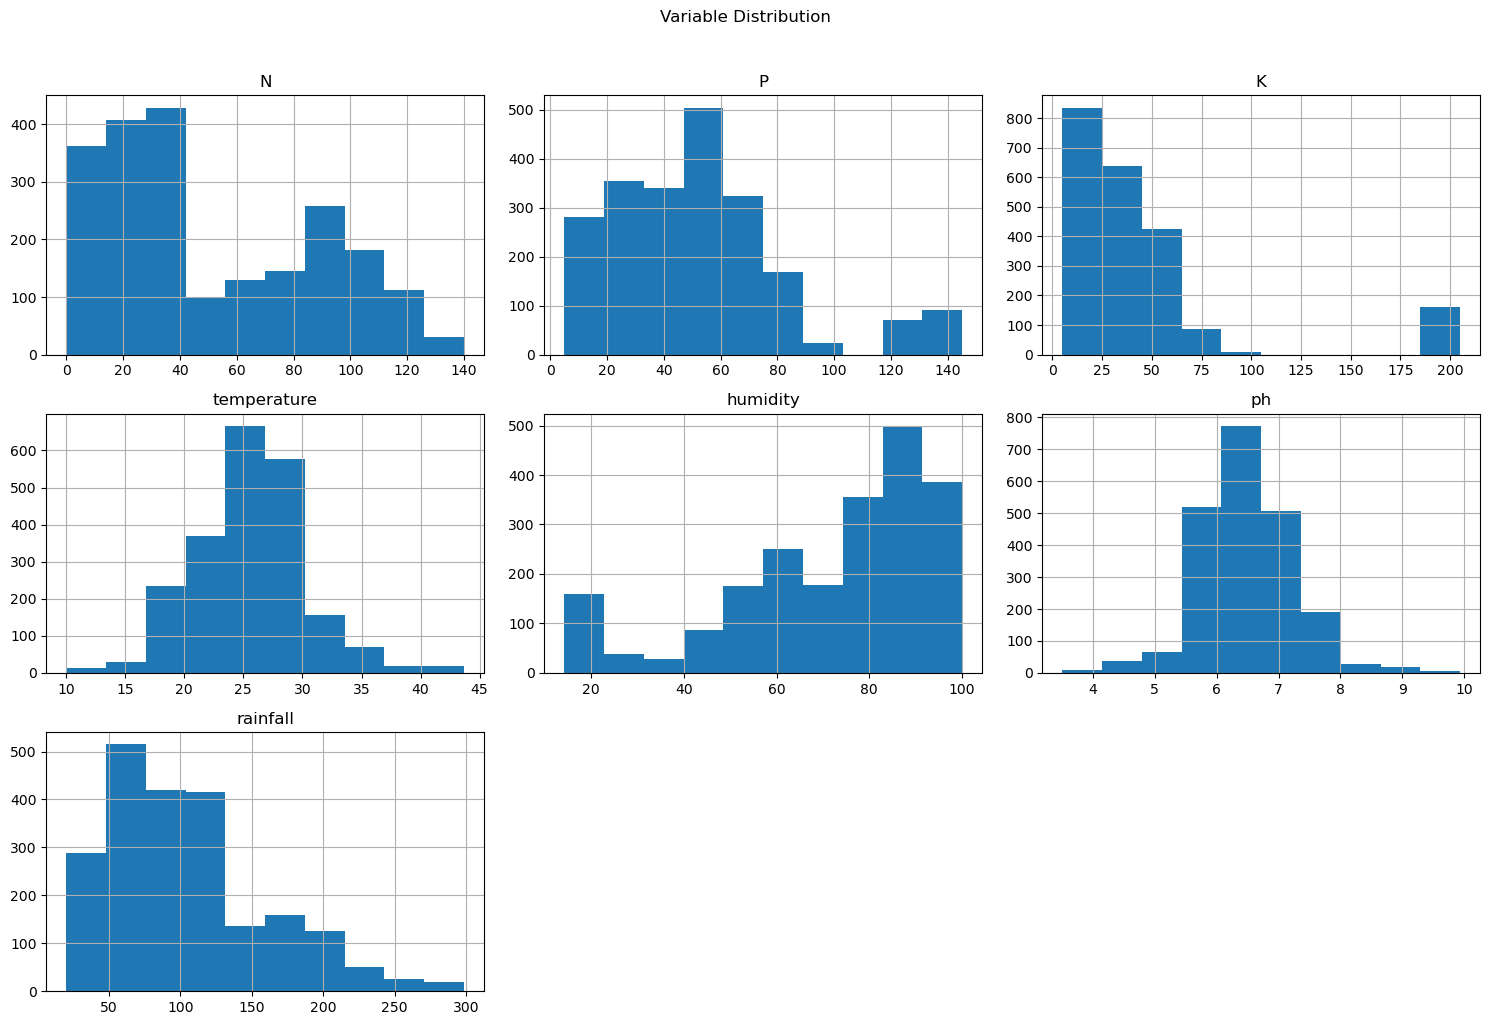

In [3]:
# Missing data visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Data Visualization')
plt.show()

# Variable distribution
features = df.drop("label", axis=1)
plt.figure(figsize=(15, 10))
features.hist(figsize=(15, 10))
plt.suptitle('Variable Distribution', y=1.02)
plt.tight_layout()
plt.show()

features = df.drop("label", axis=1)

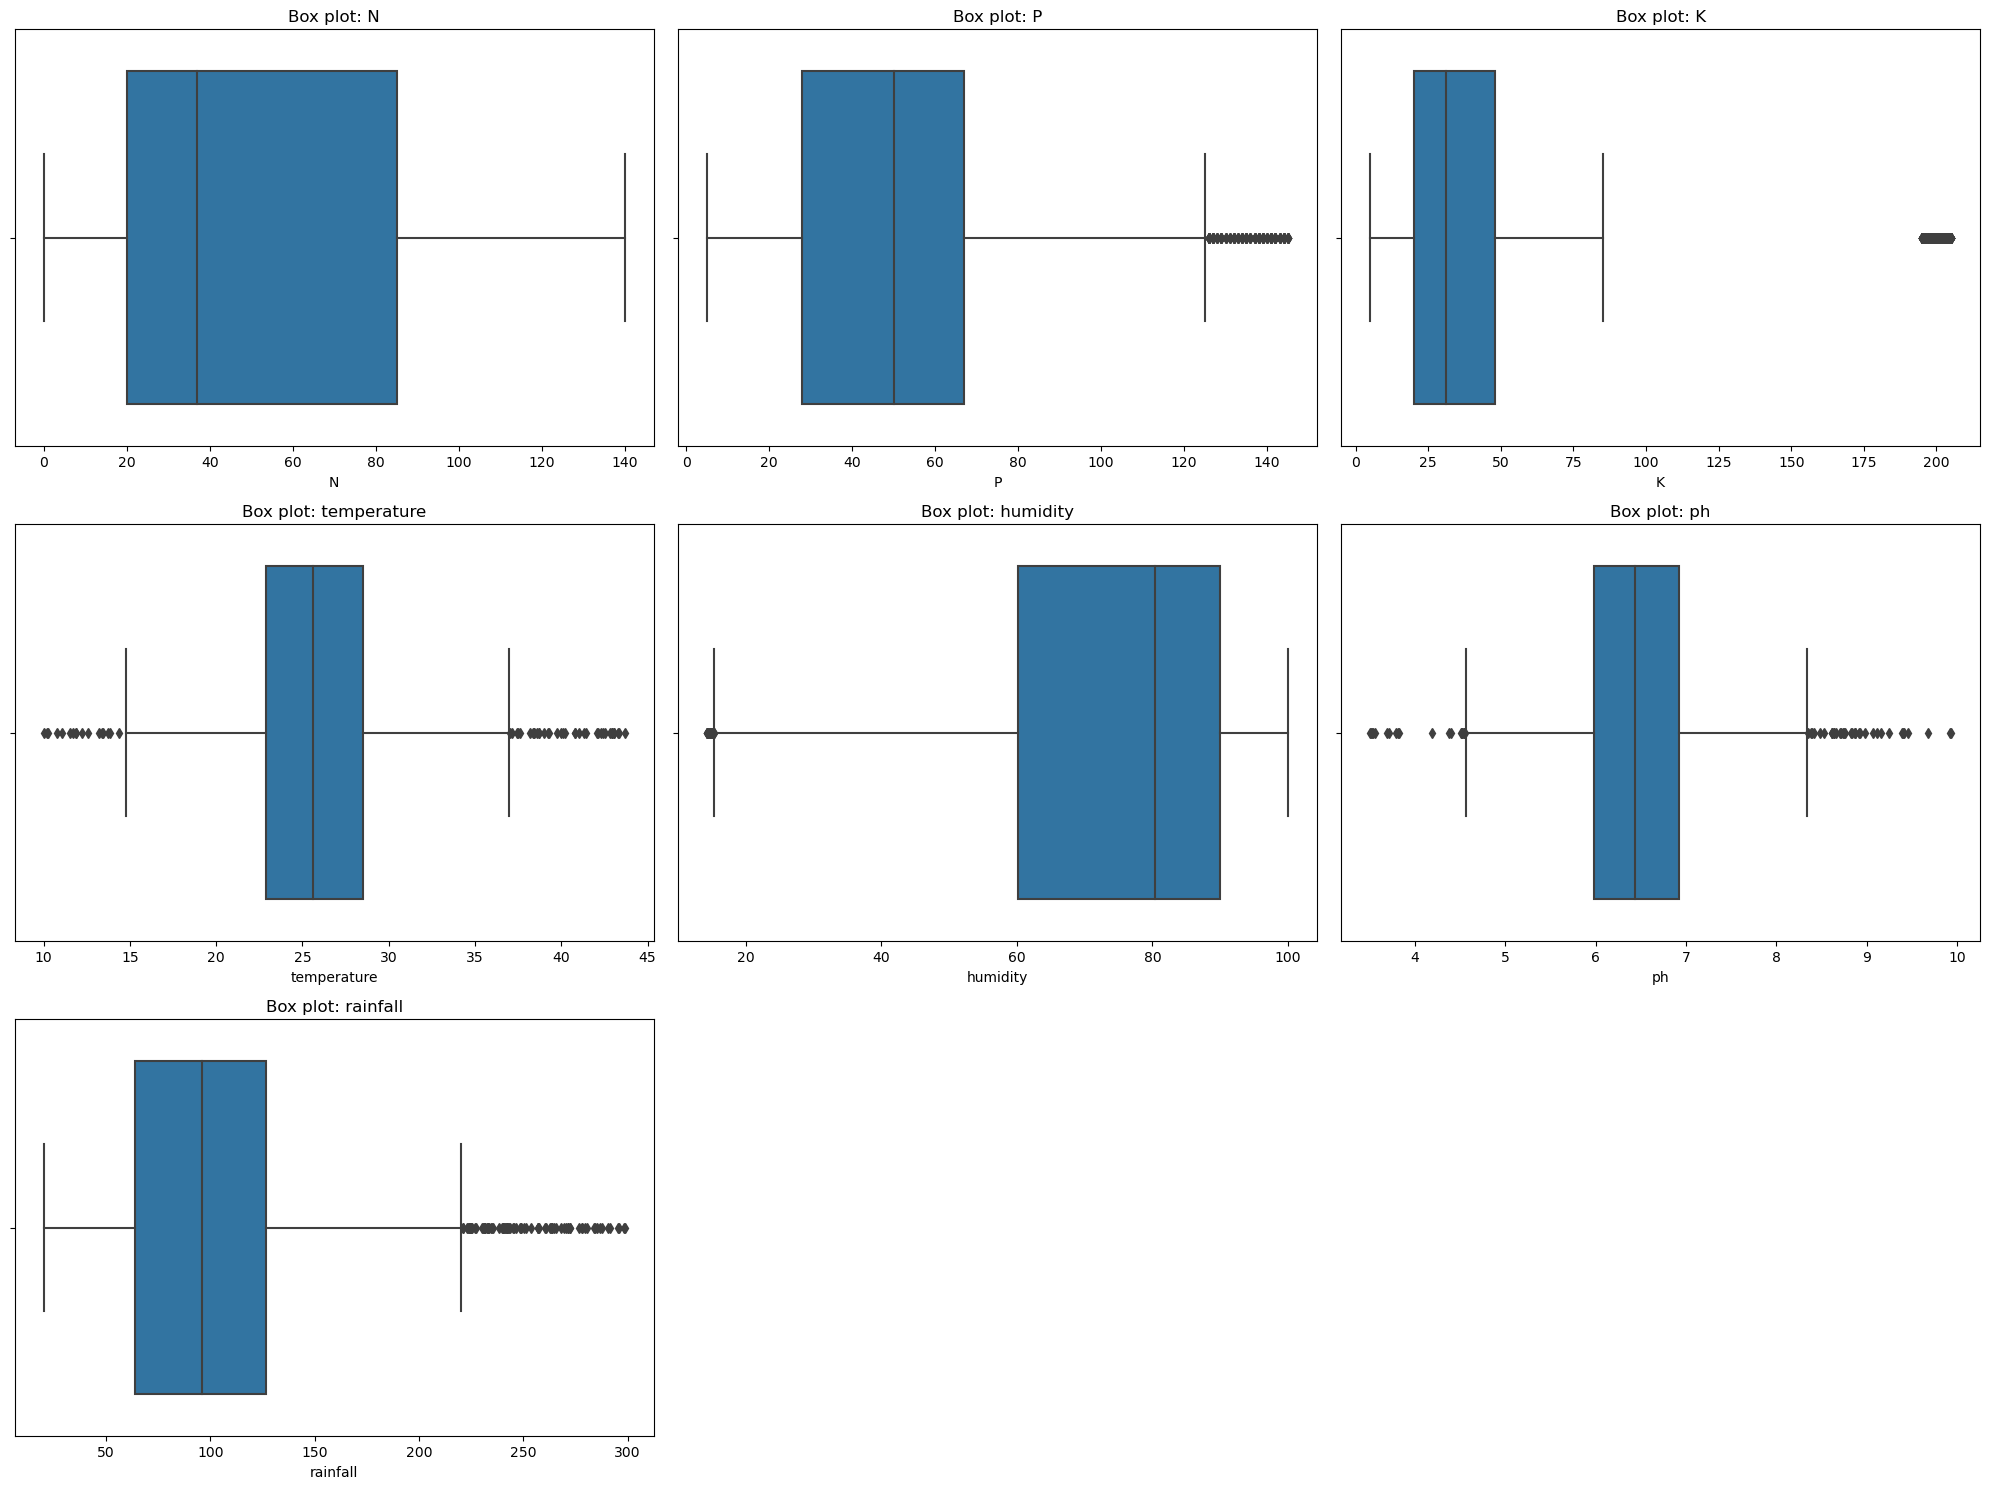

In [4]:
# box plot
n = len(features.columns)
rows = n // 3 + (1 if n % 3 else 0)
fig, axes = plt.subplots(rows, 3, figsize=(20, 5 * rows))

if n % 3:
    for idx in range(n % 3, 3):
        fig.delaxes(axes[rows-1][idx])

for idx, column in enumerate(features.columns):
    row_idx = idx // 3
    col_idx = idx % 3
    sns.boxplot(x=features[column], ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Box plot: {column}')

plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# label encoding
df['label'] = pd.Categorical(df['label'])
df['label_code'] = df['label'].cat.codes


X = df.drop(["label", "label_code"], axis=1)
y = df['label_code']


label_mapping = pd.DataFrame({
    'label': df['label'],
    'label_code': df['label_code']
})

label_mapping = label_mapping.drop_duplicates()

label_mapping = label_mapping.sort_values('label_code').reset_index(drop=True)

print(label_mapping)


          label  label_code
0         apple           0
1        banana           1
2     blackgram           2
3      chickpea           3
4       coconut           4
5        coffee           5
6        cotton           6
7        grapes           7
8          jute           8
9   kidneybeans           9
10       lentil          10
11        maize          11
12        mango          12
13    mothbeans          13
14     mungbean          14
15    muskmelon          15
16       orange          16
17       papaya          17
18   pigeonpeas          18
19  pomegranate          19
20         rice          20
21   watermelon          21


In [6]:
# train ,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standardzation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
print(X_train_scaled_df.head())
X_test_scaled = scaler.transform(X_test)

#train_test_shapes_annotated = ("Training data shape (features):", X_train.shape, 
#                              "Training data shape (labels):", y_train.shape,
#                              "Test data shape (features):", X_test.shape,
#                              "Test data shape (labels):", y_test.shape)

#train_test_shapes_annotated


          N         P         K  temperature  humidity        ph  rainfall
0 -1.073706 -1.127233 -0.312384     0.924979 -0.927217 -0.478003 -0.214794
1 -0.856807 -0.518725 -0.312384     0.913615 -0.966196 -1.044822 -0.143243
2 -1.209267 -0.710885 -0.037969    -1.241933  0.789548 -0.960304 -0.021834
3 -0.341672  0.345996 -0.523473    -0.379922 -0.437658  0.246597 -0.923585
4  1.583304 -1.031152  0.194229     0.497863  0.875540  0.120721 -1.493559


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Silhouette analysis on KMeans clustering
range_n_clusters = list(range(2, 23))  # Example range from 2 to 11 clusters

silhouette_avg_scores = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"For n_clusters={num_clusters}, the average silhouette_score is : {silhouette_avg}")


For n_clusters=2, the average silhouette_score is : 0.43004131554778086
For n_clusters=3, the average silhouette_score is : 0.25258992307825395
For n_clusters=4, the average silhouette_score is : 0.26936466535243525
For n_clusters=5, the average silhouette_score is : 0.2881751902475576
For n_clusters=6, the average silhouette_score is : 0.3055445603795372
For n_clusters=7, the average silhouette_score is : 0.3343544458948755
For n_clusters=8, the average silhouette_score is : 0.3290910030593965
For n_clusters=9, the average silhouette_score is : 0.3463324005268363
For n_clusters=10, the average silhouette_score is : 0.346364271770538
For n_clusters=11, the average silhouette_score is : 0.35236379007309404
For n_clusters=12, the average silhouette_score is : 0.35536019784649686
For n_clusters=13, the average silhouette_score is : 0.3515642370920877
For n_clusters=14, the average silhouette_score is : 0.35468113545999946
For n_clusters=15, the average silhouette_score is : 0.353605942967

In [8]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, adjusted_rand_score, silhouette_score

kmeans = KMeans(n_clusters=22, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_scaled)

conf_matrix = confusion_matrix(y_train, cluster_labels)
print("confusion_matrix1:\n", conf_matrix)



confusion_matrix1:
 [[ 0  0  0 81  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 81  0  0  0  0  0  0  0]
 [82  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 80  0  0  0  0]
 [ 0 69  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0 52  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 78  0  0  0  0  0  0  0  0  3  0  3  0  0  0  0]
 [ 0  0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 63]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 80  0  0]
 [ 0  0  0  0  0 55  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0]
 [ 7  0  0  0  0 12  0  0  0  0  0  0 29 22  0  0  0  0  0  0  0  8]
 [ 0  0  0  0 

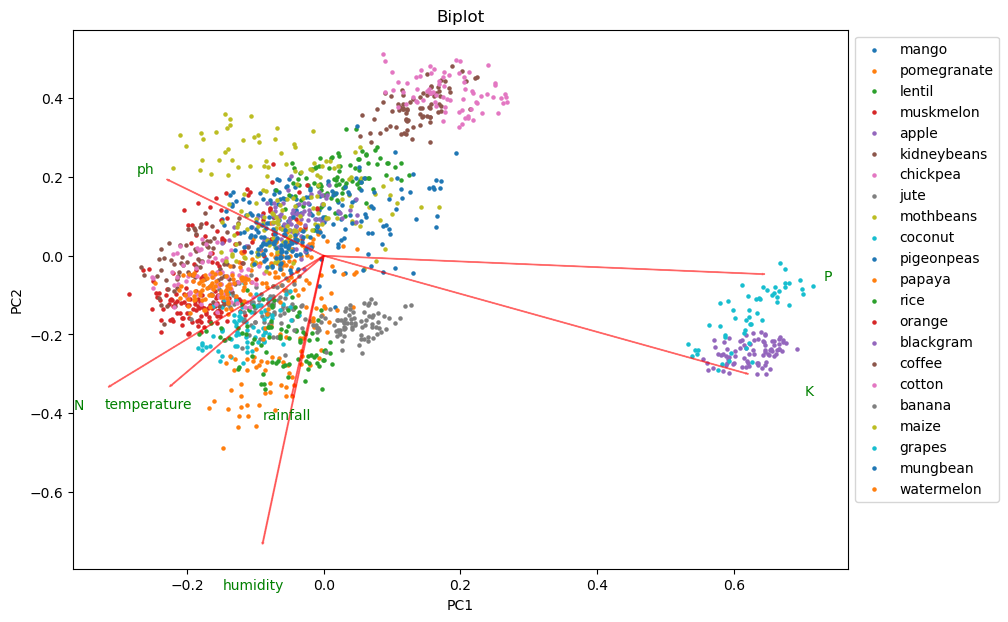

In [9]:
from sklearn.decomposition import PCA
# Biplot
def biplot(score, coeff, labels=None, colors=None, unique_labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    # Create a scatter plot for each unique label
    if unique_labels is not None:
        for label in unique_labels:
            idx = np.where(colors == label)
            plt.scatter(xs[idx] * scalex, ys[idx] * scaley, s=5, label=df[df['label_code'] == label]['label'].iloc[0])
    else:
        plt.scatter(xs * scalex, ys * scaley, s=5, c=colors, cmap='Set3')
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    
    # Add legend if unique_labels is provided
    if unique_labels is not None:
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_train_scaled)
            
unique_labels = y_train.unique()

plt.figure(figsize=(10, 7))
biplot(pca_result, np.transpose(pca.components_[0:2, :]), labels=X_train.columns, colors=y_train, unique_labels=unique_labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot")
plt.show()

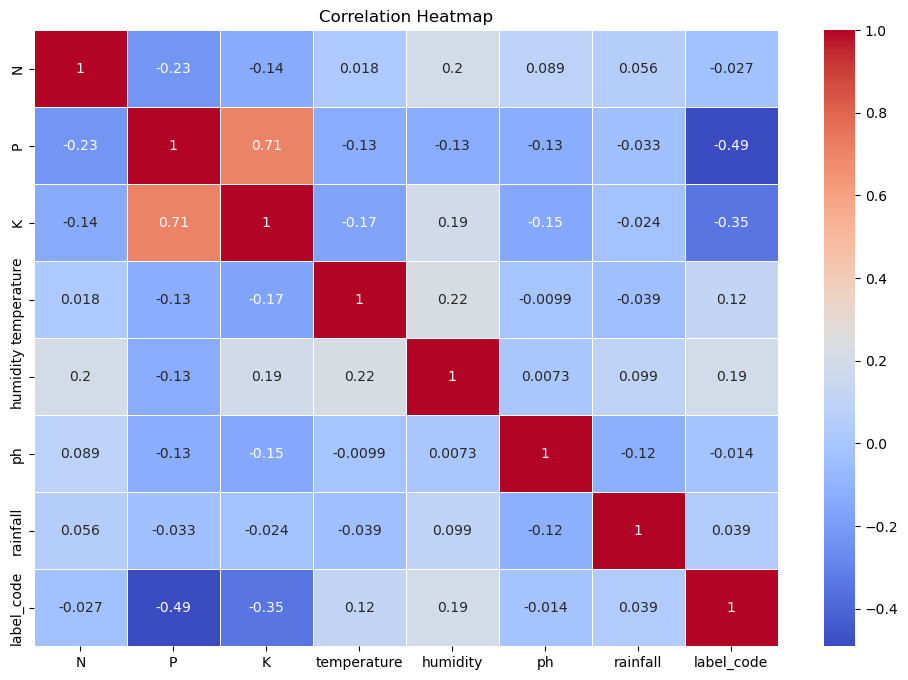

('Correlation with label_code:',
 N             -0.027191
 P             -0.490786
 K             -0.346673
 temperature    0.118962
 humidity       0.194701
 ph            -0.014055
 rainfall       0.039037
 label_code     1.000000
 Name: label_code, dtype: float64)

In [10]:
# correlation (heat map)
correlation = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()


label_correlation_annotated = ("Correlation with label_code:", correlation['label_code'])

label_correlation_annotated

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve,cross_val_score
parameters = {
    'C': [0.1, 1, 10, 100],  # values for C
    'gamma': ['scale', 'auto'], 
    'kernel': ['rbf', 'linear']  # Trying both linear and RBF kernels
}

# SVM
svm_model = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(svm_model, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best model after grid search
best_svm_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

y_pred = best_svm_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


accuracy_annotated = ("Accuracy of SVM Model:", accuracy_score(y_test, y_pred))

accuracy_annotated

Cross-validation scores: [0.98550725 0.99130435 0.97971014 0.9884058  0.99418605]
Mean CV Score: 0.9878227165487022
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        24
           5       1.00      0.95      0.97        20
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        10
           8       0.73      1.00      0.84        16
           9       0.95      1.00      0.98        21
          10       1.00      1.00      1.00        15
          11       0.95      1.00      0.97        18
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00      

('Accuracy of SVM Model:', 0.9814814814814815)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

comparison_array = np.column_stack((y_test, y_pred))

# Display the array
print("Comparison between Actual Labels (y_test) and Predicted Labels (y_pred):")
print(comparison_array)
#residuals = y_test - y_pred
#plt.figure(figsize=(10, 6))
#plt.scatter(y_test, residuals, color='blue', s=50, alpha=0.5)
#plt.hlines(y=0, xmin=np.min(y_test), xmax=np.max(y_test), colors='red', linewidths=2)
#plt.xlabel('Actual Values')
#plt.ylabel('Residuals')
#plt.title('Residual Plot')
#plt.show()

Comparison between Actual Labels (y_test) and Predicted Labels (y_pred):
[[14 14]
 [15 15]
 [11 11]
 [ 9  9]
 [19 19]
 [13 13]
 [ 3  3]
 [ 3  3]
 [ 2  2]
 [18  9]
 [ 4  4]
 [ 4  4]
 [10 10]
 [18 18]
 [20  8]
 [21 21]
 [ 5  5]
 [19 19]
 [ 7  7]
 [13 13]
 [10 10]
 [15 15]
 [ 0  0]
 [14 14]
 [ 9  9]
 [20 20]
 [13 13]
 [ 8  8]
 [ 8  8]
 [ 9  9]
 [12 12]
 [11 11]
 [ 3  3]
 [17 17]
 [11 11]
 [ 7  7]
 [11 11]
 [14 14]
 [16 16]
 [ 4  4]
 [13 13]
 [17 17]
 [ 9  9]
 [ 4  4]
 [ 4  4]
 [ 5  5]
 [11 11]
 [21 21]
 [18 18]
 [14 14]
 [19 19]
 [11 11]
 [16 16]
 [15 15]
 [ 5  5]
 [ 5  5]
 [ 3  3]
 [13 13]
 [15 15]
 [ 6  6]
 [ 3  3]
 [18 18]
 [11 11]
 [10 10]
 [ 9  9]
 [15 15]
 [ 6  6]
 [ 3  3]
 [15 15]
 [ 0  0]
 [ 4  4]
 [ 6  6]
 [ 1  1]
 [ 4  4]
 [12 12]
 [ 0  0]
 [10 10]
 [14 14]
 [ 2  2]
 [ 5  5]
 [ 9  9]
 [20 20]
 [13 13]
 [12 12]
 [11 11]
 [21 21]
 [ 1  1]
 [15 15]
 [19 19]
 [19 19]
 [21 21]
 [17 17]
 [11 11]
 [ 6  6]
 [ 6  6]
 [ 9  9]
 [ 0  0]
 [16 16]
 [13 13]
 [ 8  8]
 [ 3  3]
 [ 9  9]
 [12 12]


In [13]:
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

# F1
f1 = f1_score(y_test, y_pred, average='macro') 
print("F1 Score:", f1)

train_sizes, train_scores, validation_scores = learning_curve(
    best_svm_model,
    X_train_scaled,
    y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=5,
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

#plt.figure()
#plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")
#plt.title("Learning curve")
#plt.xlabel("Training examples")
#plt.ylabel("Score")
#plt.legend(loc="best")
#plt.show()

F1 Score: 0.9793449241692828


Unique labels in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


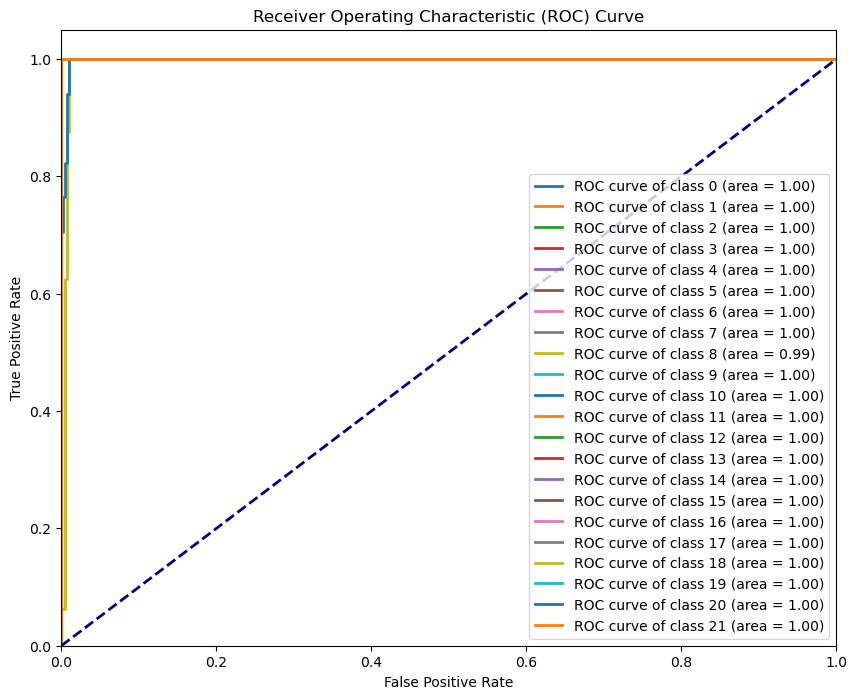

In [14]:
# ROC

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score = best_svm_model.decision_function(X_test_scaled)

unique_labels_train = np.unique(y_train)
unique_labels_test = np.unique(y_test)

print("Unique labels in y_train:", unique_labels_train)
print("Unique labels in y_test:", unique_labels_test)


n_classes = y_test_bin.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

